# Optimizing a chemical reaction

As a very simple example of optimizing a chemical reaction, we try to find the
mix of universal indicator, acid and base that gives the best green color. While this
is a very simple experiment, it shows the general approach one would follow in
optimizing a chemical reaction according to yield or purity.

We have made a full factorial mix of different levels of indicator while varying the percentage of acid (`V(acid)/(V(acid) + V(base))*100 %`),
and measured the resulting color:

![Full factorial indicator and acid mix in a plate](../ProcessOptimizer/model_systems/data/color_pH_image.jpg)

When in the lab, you would normally do one experiment at a time. To simulate this, we have
made it possible to look up the result from any recipe. In other words, we can do theoretical
experiments that mimic what you would see if you were to
do laboratory experiments one at a time. This behavior is
captured by the model system color_pH.

We first set up the parameter space and the optimizer:

In [1]:
import ProcessOptimizer as po

search_space = [
       po.Integer(30,80, name="percent_acid"),
       po.Integer(5,40, name="indicator")
       ]

opt = po.Optimizer(search_space, n_initial_points=4)


We then import the model system:

In [2]:
model_system = po.model_systems.color_pH

We can now ask the optimizer to suggest the next recipe to try, and use the
model system to simulate following the recipe and telling us how good
the result is:

In [3]:
# Get the first suggested experiment
next_recipe = opt.ask()
print(("Next suggested experiment has "
      + str(next_recipe[0])
      + " percent acid and "
      + str(next_recipe[1])
      + " μL indicator."))



Next suggested experiment has 74 percent acid and 36 μL indicator.


## Blabla, using the model system separately, as this would normally be the result of a physical experiment

In [9]:
# Run the experiment and get the result
quality = model_system.get_score(next_recipe)

recipe_and_result_list = [(next_recipe, quality)]

print(f"Following the recipe lead to a quality of {str(quality)}")

NameError: name 'next_recipe' is not defined

Now, we can tell the optimizer about the recipe we just "followed".

In [5]:
result = opt.tell(next_recipe, quality)

We can keep doing this for a few runs.

In [6]:
for i in range(10):
    next_recipe = opt.ask()
    quality = model_system.get_score(next_recipe)
    recipe_and_result_list.append((next_recipe, quality))
    result = opt.tell(next_recipe, quality)

c:\Users\srfu\programming\ProcessOptimizer\.env_pub\lib\site-packages\ProcessOptimizer\optimizer\optimizer.py:598: UserWarning: The objective has been evaluated at this point before.
  warnings.warn(


Finally, we can plot the result object in different ways to inspect the model.

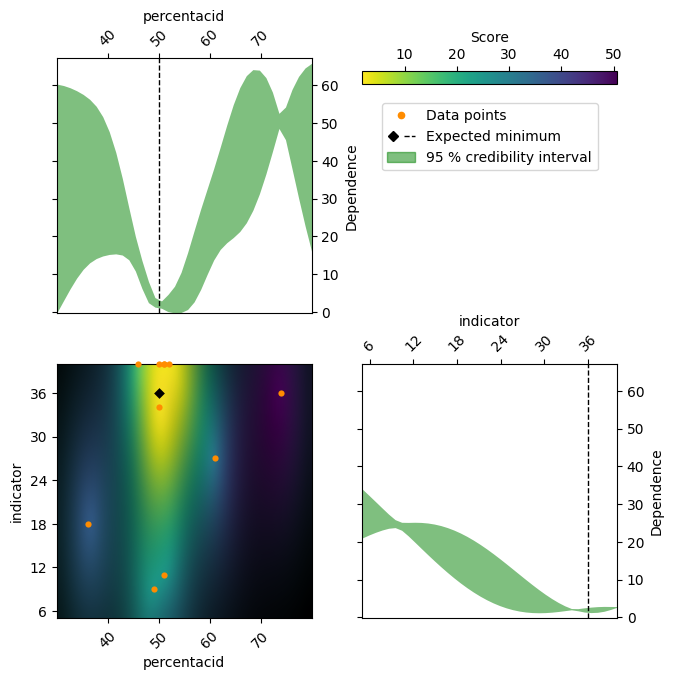

In [7]:
# Make additional plot with measurement uncertainty

po.plot_objective(result,
                  pars = 'expected_minimum',
                  plot_options = {"interpolation": "bicubic"},
                  );

Explain expected minimum, and why it isn't necessarily the true minimum.

In [8]:
po.expected_minimum(result)

([50, 36], 1.9128905344709537)

## Make table from paper